# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#HLeek Observations:
Temperatures are higher the closer to the equator that you get.  Based up on the maximum temperature in the scatterplot, it appears that cities near 0 degree latitude have a max temperature around 80 degrees Fahrenheit.  From looking at the scatterplot, there appears to be a band of cities near the equators that have experienced a max temperature near 80 degrees.  This band extends from -20 degrees to 20 degrees. A quick check of the csv file of data indicates that all cities between -20 and 20 have an average temperature of 76 degrees F.  

There does not appear to be a correlation between latitude and humidity as there is no apparant cluster of plot points in the scatterplot.  The sporadic nature indicates that there is no correlation.

Much like latitude and humidity, latitude and cloudiness do not appear to be strongly correlated.  Again, on this scatterplot you see a very random patter of plot points without any visible clusters.

On average, temperatures are much warmer in the southern hemisphere this time of year.  Average maximum temperature in this hemisphere is 73 degrees F vs. 40 degrees F in the northern hemisphere.  Humidity in both hemispheres is similar this time of year with the southern hemisphere being slightly more humid. Both hemispheres have partial cloudiness this time of year with it being a slightly higher percentage in the northern hemisphere.  Additionally, it is slightly more windy in the northern hemisphere.   

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key
from keyfile import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Incorporated strftime to give today's date
from time import strftime, localtime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
ttlset = len(cities)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"

# Build query URL
#query_url = url + "APPID=" + api_key + "&units=imperial" + "&q="

#view a single city to ensure code is working
#response = requests.get(query_url + "London").json()
#print(json.dumps(response, indent=4))
#print (query_url)

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = (url + "APPID=" + api_key + "&units=imperial" + "&q=")


#should contain city, cloudiness, country, date, humidity, latitude, longitude, max temp, wind speed
city_data = {"City": [],
            "Cloudiness": [],
            "Country": [],
            "Date": [],
            "Humidity": [],
            "Latitude": [],
            "Longitude": [],
            "Max Temp": [],
            "Wind Speed": []}

#Add a counter to iterate through the city data
counter = 1

print("Beginning Data Retrieval")
print("------------------------------")

# https://openweathermap.org/current#severalid
for city in cities:
    response = requests.get(query_url + city).json()
    #Was data retrieved from the query?
    if response["cod"] != "404": 
        print("Processing Record {} | {}".format(counter, city))
        city_data["City"].append(response['name'])
        city_data["Cloudiness"].append(response['clouds']['all'])
        city_data["Country"].append(response['sys']['country'])
        city_data["Date"].append(response['dt'])
        city_data["Humidity"].append(response['main']['humidity'])
        city_data["Latitude"].append(response['coord']['lat'])
        city_data["Longitude"].append(response['coord']['lat'])
        city_data["Max Temp"].append(response['main']['temp_max'])
        city_data["Wind Speed"].append(response['wind']['speed'])
        counter += 1
#sleep for 1.05 seconds after each call per OpenWeatherDocs
        time.sleep(1.05)
    
    else: 
        print("City {} not found.  Skipping...".format(city))
        time.sleep(1.05)

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")



Beginning Data Retrieval
------------------------------
Processing Record 1 | jamestown
Processing Record 2 | acaponeta
City krasnoselkup not found.  Skipping...
Processing Record 3 | mar del plata
City karamea not found.  Skipping...
Processing Record 4 | clyde river
Processing Record 5 | qaanaaq
Processing Record 6 | gondanglegi
Processing Record 7 | kaitangata
Processing Record 8 | puerto leguizamo
Processing Record 9 | east london
Processing Record 10 | port alfred
Processing Record 11 | avarua
Processing Record 12 | albany
Processing Record 13 | fortuna
Processing Record 14 | mataura
Processing Record 15 | erbaa
Processing Record 16 | ribeira grande
Processing Record 17 | bud
Processing Record 18 | barrow
Processing Record 19 | punta arenas
Processing Record 20 | vardo
Processing Record 21 | putevka
Processing Record 22 | rikitea
Processing Record 23 | hithadhoo
Processing Record 24 | cape town
Processing Record 25 | ushuaia
Processing Record 26 | urucara
Processing Record 27 | bu

Processing Record 214 | nikolskoye
Processing Record 215 | shaoyang
Processing Record 216 | kulhudhuffushi
Processing Record 217 | kavaratti
Processing Record 218 | mecca
Processing Record 219 | kitimat
Processing Record 220 | husavik
Processing Record 221 | pinawa
Processing Record 222 | greenlaw
Processing Record 223 | marabba
Processing Record 224 | ilulissat
Processing Record 225 | yar-sale
Processing Record 226 | shahr-e babak
Processing Record 227 | pisco
Processing Record 228 | looc
Processing Record 229 | lagoa
Processing Record 230 | diu
City marv dasht not found.  Skipping...
Processing Record 231 | bubaque
Processing Record 232 | peniche
Processing Record 233 | caraquet
Processing Record 234 | nouadhibou
Processing Record 235 | cayenne
City cheuskiny not found.  Skipping...
Processing Record 236 | pitimbu
Processing Record 237 | tiksi
Processing Record 238 | harindanga
City tabulbah not found.  Skipping...
Processing Record 239 | jvari
City bolungarvik not found.  Skipping..

Processing Record 430 | diamantino
Processing Record 431 | caluquembe
Processing Record 432 | yarmouth
Processing Record 433 | tual
Processing Record 434 | mutoko
Processing Record 435 | velke mezirici
Processing Record 436 | samana
Processing Record 437 | lengshuitan
Processing Record 438 | kentau
Processing Record 439 | victoria
Processing Record 440 | moranbah
Processing Record 441 | bangkalan
Processing Record 442 | canavieiras
Processing Record 443 | san blas
Processing Record 444 | palaikastron
Processing Record 445 | hanna
Processing Record 446 | kurchanskaya
Processing Record 447 | karaton
Processing Record 448 | seydi
Processing Record 449 | daru
Processing Record 450 | mayo
Processing Record 451 | lorengau
Processing Record 452 | newcastle
City samusu not found.  Skipping...
Processing Record 453 | taksimo
Processing Record 454 | poronaysk
Processing Record 455 | bilibino
Processing Record 456 | razole
City palabuhanratu not found.  Skipping...
Processing Record 457 | komsomo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
city_df = pd.DataFrame(city_data) 
city_df.to_csv(r'C:\Users\reese\OneDrive\Desktop\Homework\06-Python-APIs\Homework\Instructions\starter_code\hleek_cityout.csv')
city_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Jamestown,20,AU,1551048792,40,-33.21,-33.21,79.64,7.65
1,Acaponeta,20,MX,1551048932,69,22.49,22.49,76.72,11.68
2,Mar del Plata,32,AR,1551048935,64,-46.43,-46.43,49.40,12.68
3,Clyde River,1,CA,1551046920,75,70.47,70.47,-20.21,5.82
4,Qaanaaq,8,GL,1551048938,100,77.48,77.48,-18.87,7.20


In [6]:
# Converting the time to mm/dd/yy format
#capital y provides full year and lowercase provides small y
currentdate = datetime.datetime.fromtimestamp(city_df['Date'].max()).strftime('%m/%d/%y')
currentdate



'02/24/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

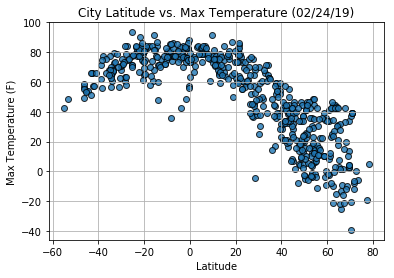

In [7]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(city_df['Latitude'], city_df['Max Temp'], marker="o", edgecolors="black", alpha=0.8)
# Incorporate labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (" + currentdate + ")")
plt.grid(True)
plt.savefig('latvstemp.png')
plt.show()



#### Latitude vs. Humidity Plot

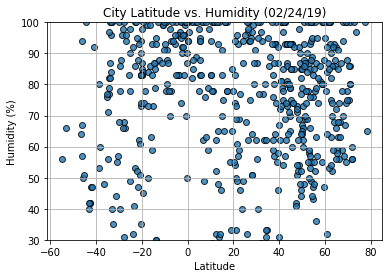

In [8]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_df['Latitude'], city_df['Humidity'], marker="o", edgecolors="black", alpha=0.8)
plt.ylim(30, 100)
# Incorporate labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (" + currentdate + ")")
plt.grid(True)
plt.savefig('latvshumid.png')
plt.show()

#### Latitude vs. Cloudiness Plot

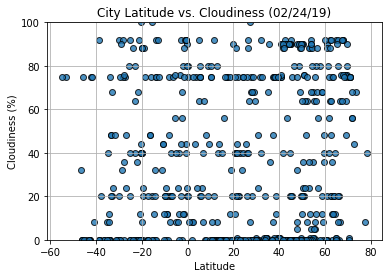

In [9]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], marker="o", edgecolors="black", alpha=0.8)
plt.ylim(0, 100)
# Incorporate labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (" + currentdate + ")")
plt.grid(True)
plt.savefig('latvscloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

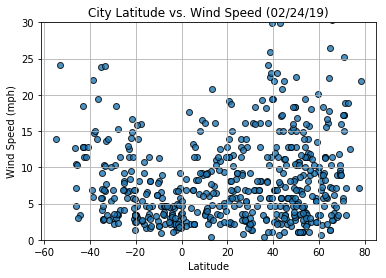

In [10]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], marker="o", edgecolors="black", alpha=0.8)
plt.ylim(0, 30)
# Incorporate labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (" + currentdate + ")")
plt.grid(True)
plt.savefig('latvswind.png')
plt.show()